# ADAR activity

The ADAR enzyme deaminate adenosine residues to inosine in double stranded RNA sequences. This has been implicated both as an antiviral defense mechanism (it may destroy viral genomes / transcripts) and as a means to block the RNAi machinery (mismatches may not be efficiently processed). In Illumina sequencing the inosine is read out as G, leaving behind a detectable A to G transition. Do SARS-CoV-2 datasets show any of these signs ? 

In [174]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [175]:
variants = pd.read_csv('variant_list.05.tsv', sep='\t')
variants_no_filter = pd.read_csv('variant_list.tsv', sep='\t')

In [176]:
def plot_transitions(variants):
    interesting_samples = variants.Sample.value_counts() >= 20
    interesting_samples = interesting_samples.index[interesting_samples]
    filtered_df = variants[variants.Sample.isin(interesting_samples)]
    s = filtered_df.groupby(['Sample', 'REF', 'ALT']).count()['CHROM']
    df = s.reset_index()
    df['transition'] = df.REF + '>' + df.ALT
    fig, axes = plt.subplots(ncols=1, nrows=24, figsize=(5, 40))
    for sample, ax in zip(df.Sample.unique(), axes):
        subset = df[df.Sample == sample]
        subset.plot(kind='bar', x='transition', y='CHROM', legend=False, title=sample, ax=ax)
    plt.tight_layout()
    return fig

/Users/mvandenb/src/galaxy/.venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/mvandenb/src/galaxy/.venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/mvandenb/src/galaxy/.venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/mvan

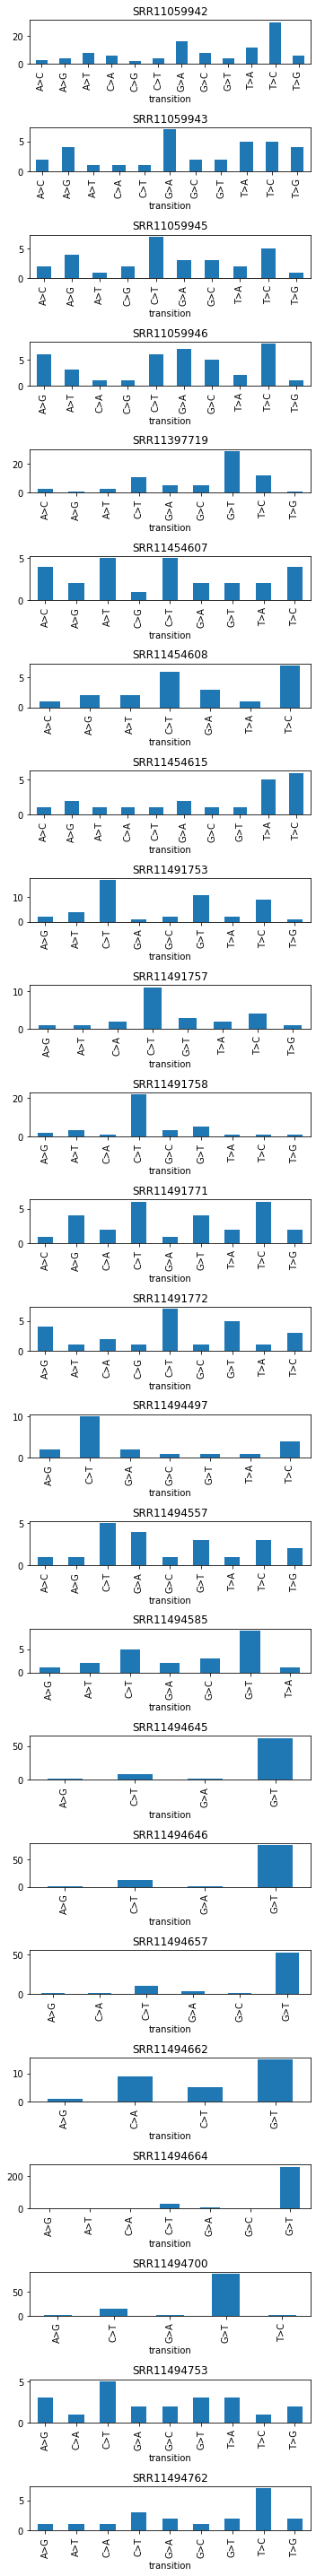

In [177]:
plot_transitions(variants).savefig('NT transition 0.05 AF filter.pdf', bbox_inches='tight')

/Users/mvandenb/src/galaxy/.venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/mvandenb/src/galaxy/.venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/mvandenb/src/galaxy/.venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/mvan

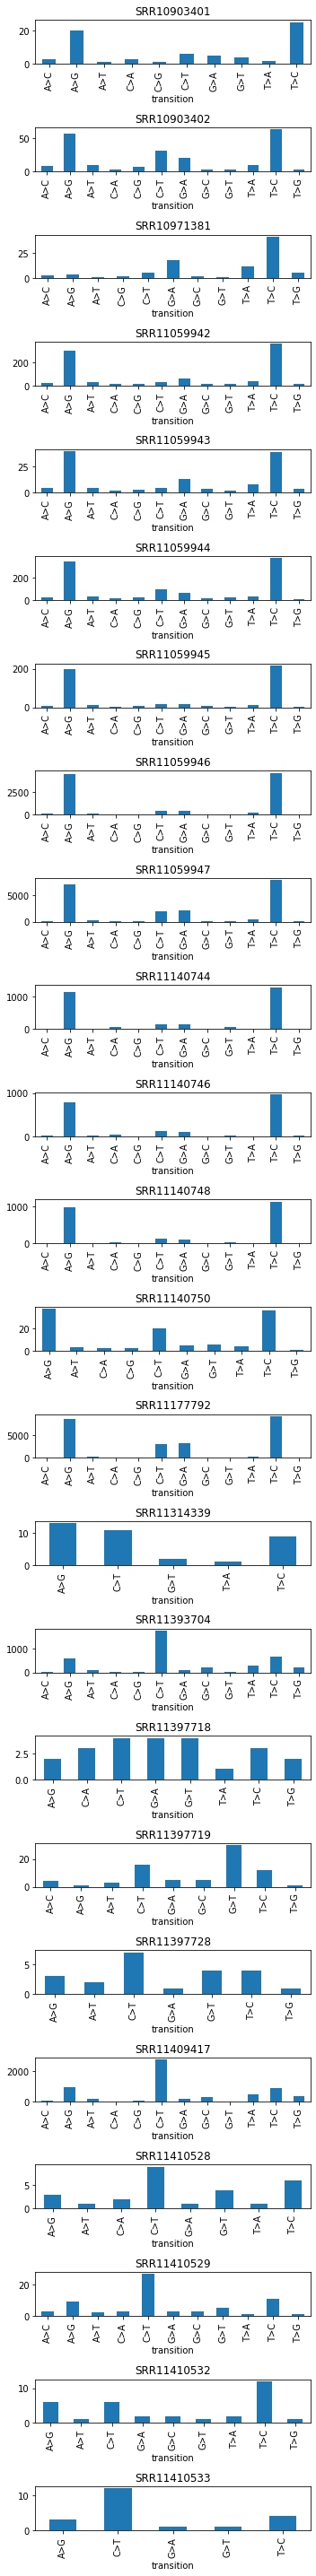

In [178]:
plot_transitions(variants_no_filter).savefig('NT transition no filter.pdf', bbox_inches='tight')

# For some of the samples this really looks like ADAR editing, especially for lower AF variants